# Project - Credit Card Fraud Detection

Anonymized credit card transactions labeled as fraudulent or genuine

<img src="./input/ryan-born-x8i6FfaZAbs-unsplash.jpg" style="height:300px">

Photo by [Ryan Born](https://unsplash.com/@b0rno)

## Context
This is a [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud) challenge organized by the ['Machine Learning Group - ULB'](http://mlg.ulb.ac.be/) (Brussels, Belgium) 2 yrs ago.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Goals
Identify fraudulent credit card transactions.
Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.



## Acknowledgements
Please refer to the web page of the Kaggle challenge provided above

## Libraries need 
usual Python stack for Data Science

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [4]:
import lightgbm as lgbm
import xgboost as xgb

# First Insight

## Content
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

In [7]:
file_path = os.path.join('input', 'creditcardfraud', 'creditcard.csv')

In [8]:
df = pd.read_csv(file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.shape

(284807, 31)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents __transactions that occurred in two days__, where we have __492 frauds out of 284,807 transactions__. The dataset is __highly unbalanced__, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the __result of a PCA transformation__. Unfortunately, due to __confidentiality issues__, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are __'Time' and 'Amount'__. Feature 'Time' contains the __seconds elapsed between each transaction and the first transaction in the dataset__. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Cleaning the dataset
Not needed here except duplicated lines. There isn't any unrealistic values because all columns corresponds to real transactions.

In [11]:
#df.isnull().sum()

In [12]:
df.duplicated().sum()

1081

The 1k duplicated lines are kept because values are scaled, and the functions could have probably rounded values...
so theses might not be real duplicates

In [13]:
#df = df.drop_duplicates()
#df.shape

More infos here on how the [Principal component analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) works. If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up can be a reasonable choice. This is probably the most common application of PCA. Another common application of PCA is for data visualization.

Here, the PCA has also been used to anonymize data.

In [14]:
non_PCA_features = ['Time', 'Amount', 'Class']
df[non_PCA_features].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


# Exploratory Data analysis

## Target imbalanced

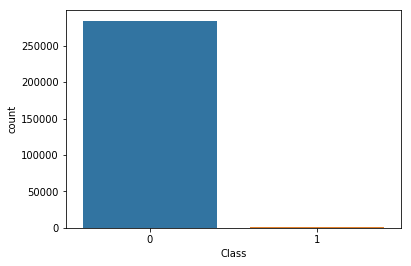

In [15]:
sns.countplot(x='Class', data=df)
plt.show()

In [16]:
ratio = df.Class.sum() / df.shape[0]
print(f'Percentage of class #1 : {ratio * 100 :.2f}% - Number of frauds is highly imbalanced !')

Percentage of class #1 : 0.17% - Number of frauds is highly imbalanced !


## Choosen metric

The goal is to identify fraudulent credit card transactions.
Given the class imbalance ratio, it's recommended measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

See [here](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/) the complete explanation of the metric, with an extract below:

It can be more flexible to predict probabilities of an observation belonging to each class in a classification problem rather than predicting classes directly.

This flexibility comes from the way that probabilities may be interpreted using different thresholds that allow the operator of the model to trade-off concerns in the errors made by the model, such as the number of false positives compared to the number of false negatives. This is required when using models where the cost of one error outweighs the cost of other types of errors.

Two diagnostic tools that help in the interpretation of probabilistic forecast for binary (two-class) classification predictive modeling problems are ROC Curves and Precision-Recall curves.

* ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
* Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
* ROC curves are appropriate when the observations are balanced between each class, whereas __precision-recall curves are appropriate for imbalanced datasets__.

What Is a Precision-Recall Curve?

__Precision__ is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.

__Recall__ is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives. Recall is the same as sensitivity.

Reviewing both precision and recall is useful in cases where there is an imbalance in the observations between the two classes. Specifically, there are many examples of no event (class 0) and only a few examples of an event (class 1).

The reason for this is that typically the large number of class 0 examples means we are less interested in the skill of the model at predicting class 0 correctly, e.g. high true negatives

<img src="./input/Line-Plot-of-Precision-Recall-Curve.png" style="height:400px">

                                        Line Plot of Precision-Recall Curve

* The curves of different models can be compared directly in general or for different thresholds.
* The area under the curve (AUC) can be used as a summary of the model skill. Area Under Curve: like the AUC, summarizes the integral or an approximation of the area under the precision-recall curve.

## Distribution of the transaction amount

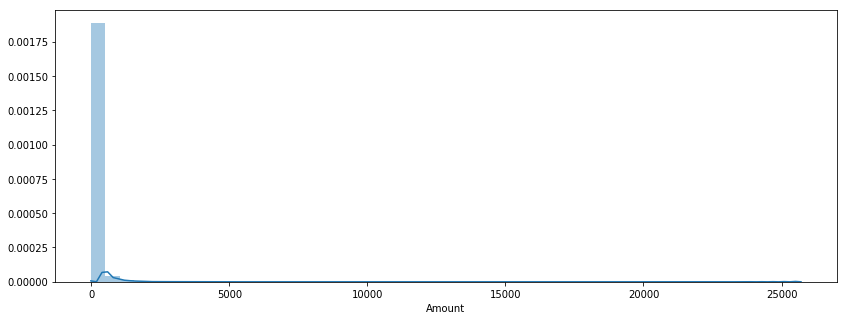

In [17]:
plt.figure(figsize=(14, 5))
sns.distplot(df['Amount'], label = 'Amount')
plt.show()

In [34]:
print(f"Percentage of transactions' amount below 200€ : {len(df[df.Amount < 200]) / len(df) * 100 :.2f}%")

Percentage of transactions' amount below 200€ : 89.71%


In [18]:
print(f"Percentage of transactions' amount below 500€ : {len(df[df.Amount < 500]) / len(df) * 100 :.2f}%")

Percentage of transactions' amount below 500€ : 96.67%


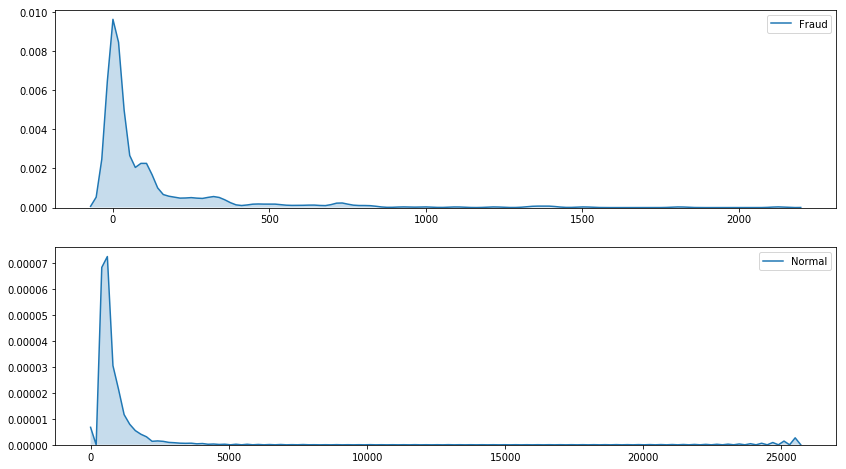

In [20]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
sns.kdeplot(df.loc[df['Class'] == 1, 'Amount'], shade=True, label = 'Fraud')
plt.subplot(2, 1, 2)
sns.kdeplot(df.loc[df['Class'] == 0, 'Amount'], shade=True, label = 'Normal')
plt.show()

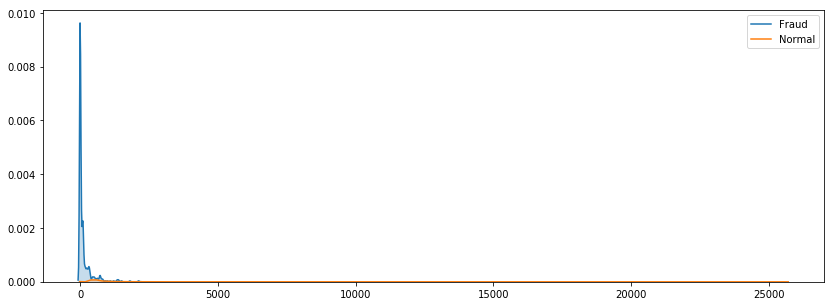

In [21]:
plt.figure(figsize=(14, 5))

sns.kdeplot(df.loc[df['Class'] == 1, 'Amount'], shade=True, label = 'Fraud')
sns.kdeplot(df.loc[df['Class'] == 0, 'Amount'], shade=True, label = 'Normal')
plt.show()

## Values depending on time

In [22]:
print(f'nb of days during when the data were collected : {df.Time.max() / (60 * 60 * 24):.2f}')

nb of days during when the data were collected : 2.00


In [23]:
df['Hours'] = round((df['Time'] / (60 * 60)) % 24)
df.Hours = df.Hours.astype(int)

In [24]:
df['Days'] = round(df['Time'] / (60 * 60 * 24))
df.Days = df.Days.astype(int)

In [25]:
df.Days.value_counts()

1    144825
2     92576
0     47406
Name: Days, dtype: int64

In [26]:
df.Class.sum()

492

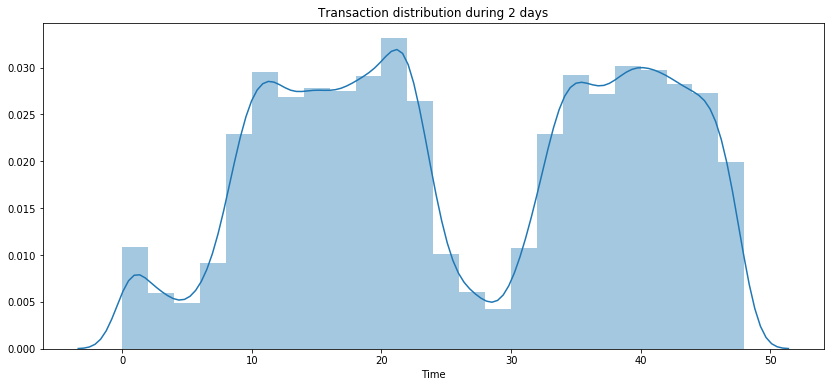

In [27]:
plt.figure(figsize=(14, 6))
sns.distplot((df['Time'] / (60 * 60)), label = 'All transactions', bins=24)
plt.title('Transaction distribution during 2 days')
plt.show()

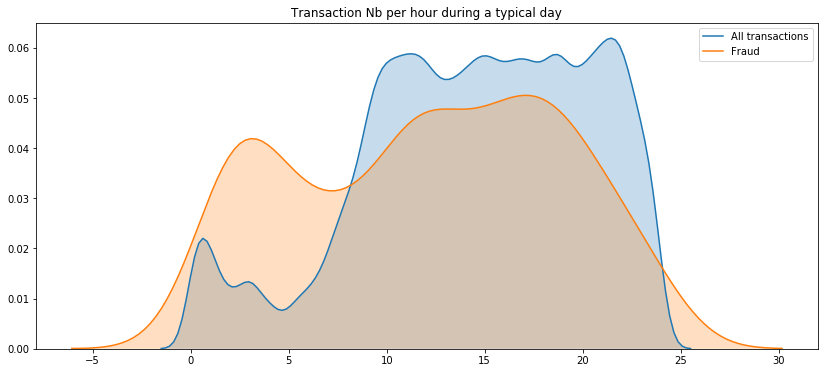

In [31]:
plt.figure(figsize=(14, 6))
sns.kdeplot((df['Time'] / (60 * 60)) % 24, label = 'All transactions', shade=True)
sns.kdeplot((df.loc[df['Class'] == 1, 'Time'] / (60 * 60)) % 24, label = 'Fraud', shade=True)
plt.title('Transaction Nb per hour during a typical day')
plt.show()

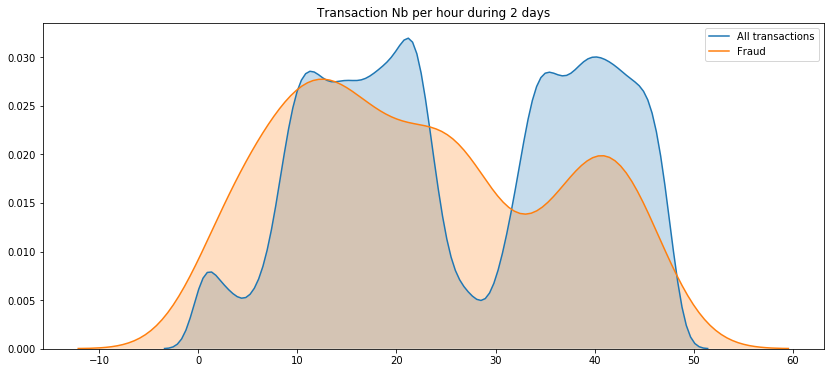

In [30]:
plt.figure(figsize=(14, 6))
sns.kdeplot((df['Time'] / (60 * 60)), label = 'All transactions', shade=True)
sns.kdeplot((df.loc[df['Class'] == 1, 'Time'] / (60 * 60)), label = 'Fraud', shade=True)
plt.title('Transaction Nb per hour during 2 days')
plt.show()

## Correlations

In [32]:
corr = df.corr()
#corr

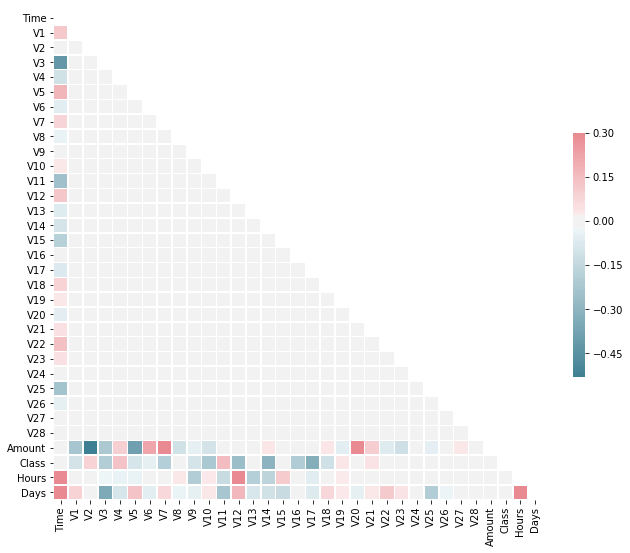

In [33]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

As expected there are not much correlations between features themselves because of the PCA. But we can see correlations between non PCA features in particular with the target. Nevertheless, there isn't any strong correlations.

## Ploting the PCA in 2D

Here it could be interesting to redo a PCA in order to reduce the dimension number to 2 or 3 so that we can easily plot the data with T-SNE. In this way, we'll be able to see if class 1 is sparsed or grouped.

* If the class 1 points are not situated at the same place, a SMOTE will add other points at the wrong place among class 0, which is not interesting for us. In this case it's a better practice to do sub/over sampling. 
* On the contrary, if the points of clas 1 are near each others, we can do a SMOTE.

First, the PCA is sensitive to different scales, so we've to centered the data and apply a standard scaler for instance.

In [35]:
pca_feat = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Hours']
y = df.Class
X_centered = df[pca_feat]

In [36]:
scaler = StandardScaler()
X_centered = scaler.fit_transform(X_centered)

/home/sunflowa/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sunflowa/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [37]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)
X_pca[:5]

array([[ 0.36387701,  1.55169943],
       [-0.42400152,  1.55246636],
       [ 1.82884782,  1.62882145],
       [ 0.26292935,  1.46965936],
       [-0.0220992 ,  1.66986345]])

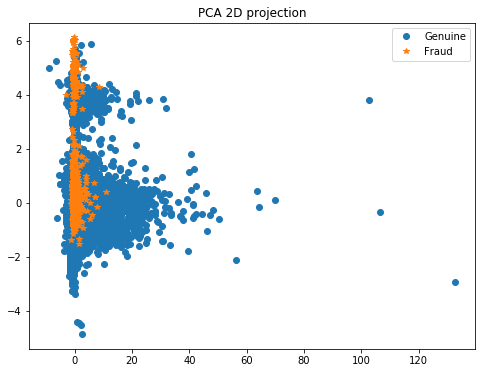

In [38]:
# Then we plot the results of PCA
plt.figure(figsize=(8, 6))
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'o', label='Genuine')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], '*', label='Fraud')
plt.legend(loc=0)
plt.title('PCA 2D projection')
plt.show()

## Plotting the TSNE in 2D - with a subsample

In [39]:
from sklearn.utils import resample

X_sub, y_sub = resample(X_pca, y, replace=False, n_samples=2000, random_state=0)

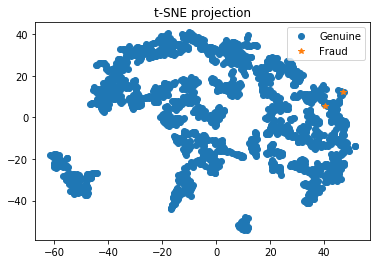

In [40]:
tsne = TSNE(n_components=2)

# Here we perform the t-SNE
X_tsne = tsne.fit_transform(X_sub)

# Then we plot the results of t-SNE
plt.plot(X_tsne[y_sub == 0, 0], X_tsne[y_sub == 0, 1], 'o', label='Genuine')
plt.plot(X_tsne[y_sub == 1, 0], X_tsne[y_sub == 1, 1], '*', label='Fraud')
plt.legend(loc=0)
plt.title('t-SNE projection')
plt.show()

## Ploting the PCA in 3D

In [41]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_centered)

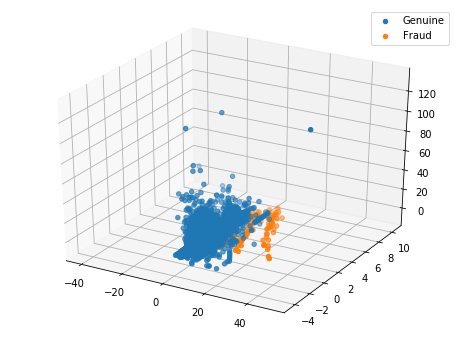

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[y == 0, 2], X_pca[y == 0, 1], X_pca[y == 0, 0], 'o', label='Genuine')
ax.scatter(X_pca[y == 1, 2], X_pca[y == 1, 1], X_pca[y == 1, 0], '*', label='Fraud')

plt.legend()
plt.show()

## Plotting the TSNE in 3D

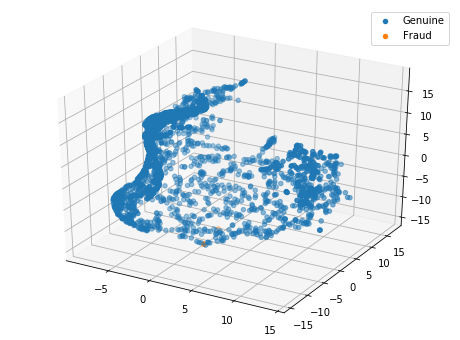

In [43]:
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X_sub)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_tsne[y_sub == 0, 0], X_tsne[y_sub == 0, 1], X_tsne[y_sub == 0, 2], 'o', label='Genuine')
ax.scatter(X_tsne[y_sub == 1, 0], X_tsne[y_sub == 1, 1], X_tsne[y_sub == 1, 2], '*', label='Fraud')

plt.legend()
plt.show()

# Data Preparation and Feature engineering

## Features kept

At first glance, it seems not interesting to keep days as data are collected over 2 days only...and it's not relevant to keep the unchanged feature 'Time'.

In [44]:
features_kept = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Hours', 'Days']

In [45]:
y = df['Class']
X = df[features_kept]

## Importance analysis

In [46]:
rnd_clf = RandomForestClassifier(n_jobs=-1)
rnd_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
feature_importances = pd.DataFrame(rnd_clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances[:10]

,importance
V12,0.216463
V14,0.106220
V17,0.090474
V9,0.084557
V10,0.064671
V18,0.057420
V16,0.053249
V11,0.042484
V4,0.034072
V7,0.024718


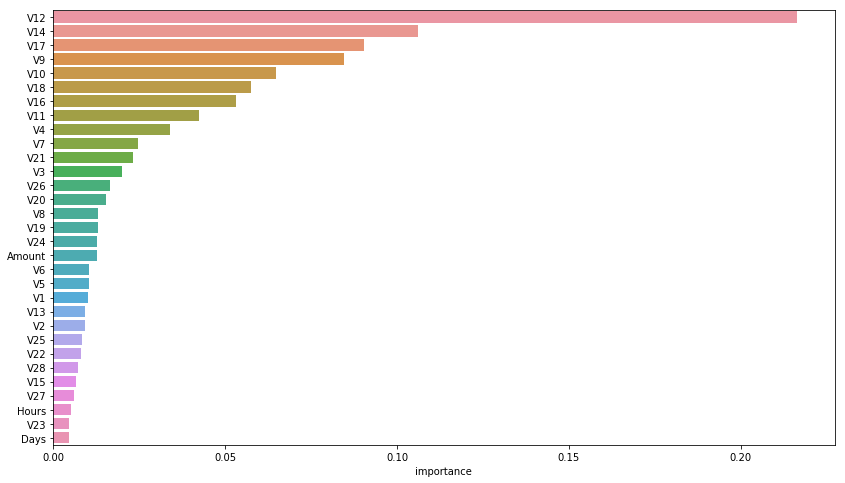

In [49]:
plt.figure(figsize=(14, 8))
sns.barplot(x="importance", y=feature_importances.index, data=feature_importances)
plt.show()

## Data transformation for models

In [50]:
X = pd.get_dummies(data=X, columns=['Hours'], drop_first=True)

In [51]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Days,Hours_1,Hours_2,Hours_3,Hours_4,Hours_5,Hours_6,Hours_7,Hours_8,Hours_9,Hours_10,Hours_11,Hours_12,Hours_13,Hours_14,Hours_15,Hours_16,Hours_17,Hours_18,Hours_19,Hours_20,Hours_21,Hours_22,Hours_23,Hours_24
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
scaler = StandardScaler()
X[['Amount', 'Days']] = scaler.fit_transform(X[['Amount', 'Days']])

/home/sunflowa/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sunflowa/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [53]:
X.drop(columns=['Days'])
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Days,Hours_1,Hours_2,Hours_3,Hours_4,Hours_5,Hours_6,Hours_7,Hours_8,Hours_9,Hours_10,Hours_11,Hours_12,Hours_13,Hours_14,Hours_15,Hours_16,Hours_17,Hours_18,Hours_19,Hours_20,Hours_21,Hours_22,Hours_23,Hours_24
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.696601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.696601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.696601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.696601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.696601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's split the data in a train and test set to evaluate models

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Baselines with weighted classes but without resampling

## Implemantation of the metric

In [55]:
# Just a test
model = RandomForestClassifier()
model.fit(X_train, y_train)

# predict probabilities
probs = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate precision-recall AUC
auc_score = auc(recall, precision)
auc_score

0.8753123564549905

In [56]:
# f1_score binary by default
def get_f1_scores(fitted_clf, model_name):
    y_train_pred, y_pred = fitted_clf.predict(X_train), fitted_clf.predict(X_test)
    print(model_name, ' :')
    print(f'Training F1 score = {f1_score(y_train, y_train_pred) * 100:.2f}% / Test F1 score = {f1_score(y_test, y_pred)  * 100:.2f}%')
    print(classification_report(y_test, y_pred))

In [57]:
def get_auc_scores(fitted_clf, model_name):
    print(model_name, ' :')
    
    # get classes predictions for the classification report 
    y_train_pred, y_pred = fitted_clf.predict(X_train), fitted_clf.predict(X_test)
    print(classification_report(y_test, y_pred), '\n') # target_names=y
    
    # computes probabilities keep the ones for the positive outcome only    
    probs = fitted_clf.predict_proba(X_test)[:, 1]
    
    # calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    
    # calculate precision-recall AUC
    auc_score = auc(recall, precision)
    print(f'Area Under the Precision-Recall Curve (AUPRC) = {auc_score * 100 :.2f}%')

## Randomforest without weighted classes

In [58]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
get_auc_scores(model, 'RandomForest not weighted')

RandomForest not weighted  :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.87      0.82      0.85        84

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962
 

Area Under the Precision-Recall Curve (AUPRC) = 88.65%


## Randomforest with weighted classes

In [91]:
y_train.sum(), len(y_train) - y_train.sum()

(398, 227447)

In [92]:
model = RandomForestClassifier(class_weight={1:398, 0:227447})
model.fit(X_train, y_train)
get_auc_scores(model, 'RandomForest weighted')

RandomForest weighted  :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.89      0.72      0.80        94

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962
 

Area Under the Precision-Recall Curve (AUPRC) = 80.41%


We can see that the F1 score is the same but not the AUPRC (AUPRC = 88.65% without weighted classes and 85.16% with). This indicates that F1 score is definitvely not a better metrice than AUPRC.

## LGBM without weights

In [63]:
model = lgbm.LGBMClassifier(n_jobs = -1)
model.fit(X_train, y_train)
get_auc_scores(model, 'LGBM non weighted')

LGBM non weighted  :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.15      0.35      0.21        84

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.58      0.67      0.61     56962
weighted avg       1.00      1.00      1.00     56962
 

Area Under the Precision-Recall Curve (AUPRC) = 20.58%


The results is disappointing...

## LGBM with weights

In [93]:
model = lgbm.LGBMClassifier(n_jobs = -1, class_weight={0:398, 1:227447})
model.fit(X_train, y_train)
get_auc_scores(model, 'LGBM weighted')

LGBM weighted  :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.81      0.81      0.81        94

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.90      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962
 

Area Under the Precision-Recall Curve (AUPRC) = 79.59%


That's better but not still less than the 1st random forrest clf.

## XGB without ratio

In [66]:
model = xgb.XGBClassifier(objective="binary:logistic")
model.fit(X_train, y_train)
get_auc_scores(model, 'XGB without ratio')

XGB without ratio  :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.87      0.77      0.82        84

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962
 

Area Under the Precision-Recall Curve (AUPRC) = 86.19%


## XGB with ratio

In [94]:
ratio = ((len(y_train) - y_train.sum()) - y_train.sum()) / y_train.sum()
ratio

570.4748743718593

In [95]:
model = xgb.XGBClassifier(objective="binary:logistic", scale_pos_weight=ratio)
model.fit(X_train, y_train)
get_auc_scores(model, 'XGB with ratio')

XGB with ratio  :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56868
           1       0.16      0.85      0.27        94

   micro avg       0.99      0.99      0.99     56962
   macro avg       0.58      0.92      0.63     56962
weighted avg       1.00      0.99      1.00     56962
 

Area Under the Precision-Recall Curve (AUPRC) = 70.62%


It seems that XGB doesn't work well with a ratio, the result is better without it.

# Using the Synthetic Minority Over-sampling Technique

## How SMOTe works

Brief description on SMOTe (Synthetic Minority Over-sampling Technique):

it creates synthetic observations of the minority class (bad loans) by:

* Finding the k-nearest-neighbors for minority class observations (finding similar observations)
* Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

More explanations can be found [here](https://medium.com/towards-artificial-intelligence/application-of-synthetic-minority-over-sampling-technique-smote-for-imbalanced-data-sets-509ab55cfdaf)


An other informative [article](https://beckernick.github.io/oversampling-modeling/)

_Oversampling is a well-known way to potentially improve models trained on imbalanced data. But it’s important to remember that oversampling incorrectly can lead to thinking a model will generalize better than it actually does. Random forests are great because the model architecture reduces overfitting (see Brieman 2001 for a proof), but poor sampling practices can still lead to false conclusions about the quality of a model._

_When the model is in production, it’s predicting on unseen data. The main point of model validation is to estimate how the model will generalize to new data. If the decision to put a model into production is based on how it performs on a validation set, it’s critical that oversampling is done correctly._

In [79]:
# conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE

In [80]:
X_train.shape, y_train.shape

((227845, 54), (227845,))

The SMOTE is applied on the train set ONLY:

In [81]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=3, n_jobs=1, ratio=0.01)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_train.shape, y_train.shape

((229711, 54), (229711,))

In [85]:
y_train.sum(), len(y_train) - y_train.sum()

(2274, 227437)

## Randomforest

In [82]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
get_auc_scores(model, 'RandomForest with SMOTE')

RandomForest with SMOTE  :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.89      0.83      0.86        84

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962
 

Area Under the Precision-Recall Curve (AUPRC) = 88.21%


Result unchanged !

In [99]:
model = RandomForestClassifier(class_weight={1:2274, 0:227437})
model.fit(X_train, y_train)
get_auc_scores(model, 'RandomForest weighted')

RandomForest weighted  :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.93      0.67      0.78        94

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.96      0.84      0.89     56962
weighted avg       1.00      1.00      1.00     56962
 

Area Under the Precision-Recall Curve (AUPRC) = 81.85%


## LGBM

In [83]:
model = lgbm.LGBMClassifier(n_jobs = -1)
model.fit(X_train, y_train)
get_auc_scores(model, 'LGBM with SMOTE')

LGBM with SMOTE  :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.86      0.81      0.83        84

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.93      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962
 

Area Under the Precision-Recall Curve (AUPRC) = 86.49%


That's really better, let's try with ratio

In [88]:
model = lgbm.LGBMClassifier(n_jobs = -1, class_weight={0:2274, 1:227437})
model.fit(X_train, y_train)
get_auc_scores(model, 'LGBM with SMOTE and ratio')

LGBM with SMOTE and ratio  :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.71      0.90      0.80        84

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.86      0.95      0.90     56962
weighted avg       1.00      1.00      1.00     56962
 

Area Under the Precision-Recall Curve (AUPRC) = 89.91%


That's the best result so far !

## Logistic Regression

In [110]:
lr = LogisticRegression(C=0.01, penalty='l1').fit(X_train, y_train)
get_auc_scores(lr, 'Logistic Regression')

Logistic Regression  :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.88      0.47      0.61        94

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.94      0.73      0.81     56962
weighted avg       1.00      1.00      1.00     56962
 

Area Under the Precision-Recall Curve (AUPRC) = 71.75%


## Precision-recall curve plot

In [96]:
probs = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)

Average precision-recall score: 0.71


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.71')

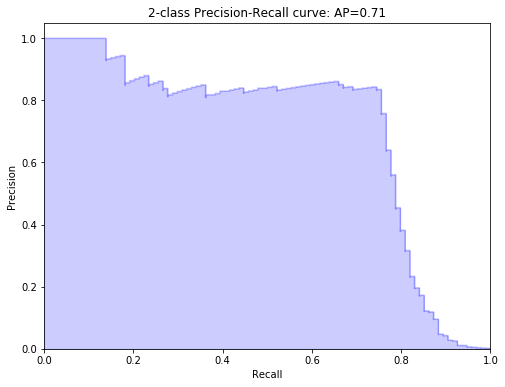

In [97]:
from inspect import signature
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, probs)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

## Models Scores Comparison

In [98]:
data = {'Country': ['Belgium',  'India',  'Brazil'],
    'Capital': ['Brussels',  'New Delhi',  'Brasilia'],
    'Population': [11190846, 1303171035, 207847528]}
test = pd.DataFrame(data,columns=['Country',  'Capital',  'Population'])
test

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasilia,207847528


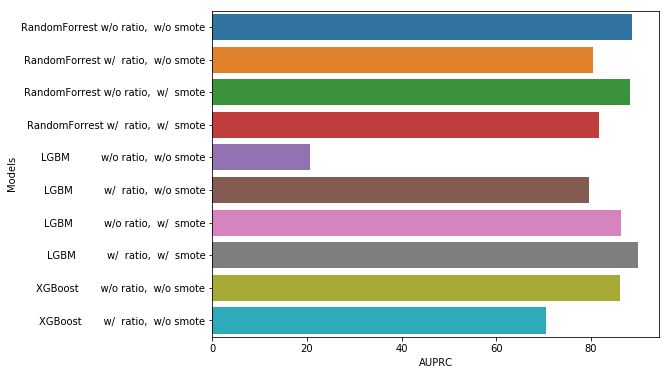

In [107]:
data = {'Models': ['RandomForrest w/o ratio,  w/o smote',
                   'RandomForrest w/  ratio,  w/o smote',
                   'RandomForrest w/o ratio,  w/  smote',
                   'RandomForrest w/  ratio,  w/  smote',
                   'LGBM          w/o ratio,  w/o smote',
                   'LGBM          w/  ratio,  w/o smote',
                   'LGBM          w/o ratio,  w/  smote',
                   'LGBM          w/  ratio,  w/  smote',
                   'XGBoost       w/o ratio,  w/o smote',
                   'XGBoost       w/  ratio,  w/o smote'],
    'AUPRC': [88.65, 80.41, 88.21, 81.85, 20.58, 79.59, 86.49, 89.91, 86.19, 70.62]}

scores_df = pd.DataFrame(data,columns=['Models',  'AUPRC'])

plt.figure(figsize=(8, 6))
sns.barplot(y="Models", x="AUPRC", data=scores_df)
plt.show()

# Using anomalies detection models
for learning purposes :)

## How LOF works under the hood

The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

## Application

In [112]:
X_sub, y_sub = resample(X, y, replace=False, n_samples=2000, random_state=0)

In [113]:
X_sub.shape, y_sub.shape

((2000, 54), (2000,))

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination="auto")
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).

y_pred = clf.fit_predict(X_train)
#n_errors = (y_pred != y).sum()
X_scores = clf.negative_outlier_factor_


plt.figure(figsize=(8,8))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=10., label='Data points')

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X_train[:, 0], X_train[:, 1], s=1000 * radius, edgecolors='r', facecolors='none', label='Outlier scores')
legend = plt.legend(loc='lower left')
plt.show()

print("prediction errors: {}".format(n_errors))
print("Negative LOF scores: {}".format(clf.negative_outlier_factor_))
print("Offset (threshold to consider sample as anomaly or not): {}".format(clf.offset_))